# Understanding Descriptive Statistics

Import the necessary libraries here:

In [145]:
# Libraries

import pandas as pd 
import numpy as np 
import random

import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [146]:
# your code here

throw_dice_10x = random.choices([1,2,3,4,5,6], k=10)
throw_dice_10x

turns = list(range(1,11))

dice_result = pd.DataFrame(list(zip(turns, throw_dice_10x)), columns=["Turns", "Dice results"])
dice_result.set_index(["Turns"], inplace=True)
dice_result

,Dice results
Turns,
1,5
2,1
3,2
4,3
5,3
6,6
7,3
8,5
9,1


#### 2.- Plot the results sorted by value.

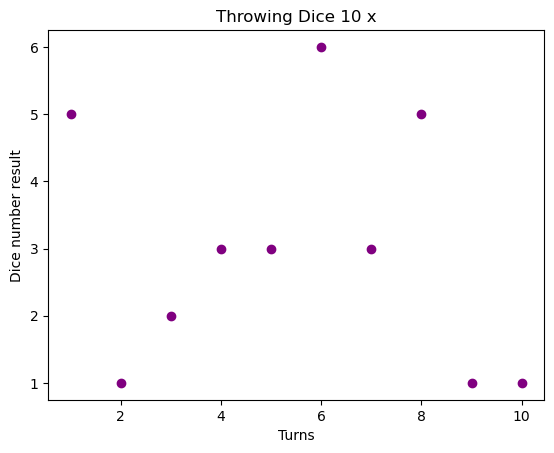

In [147]:
# your code here
plt.plot(dice_result.sort_values(by=["Dice results"], ascending=True), "o", color="purple")

plt.xlabel("Turns")
plt.ylabel("Dice number result")

plt.title("Throwing Dice 10 x")

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

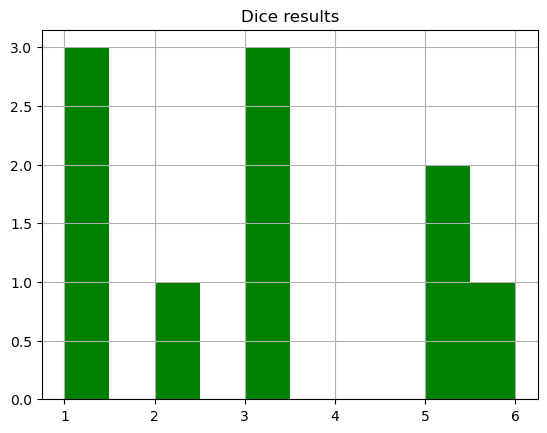

In [148]:
# your code here

dice_result.hist(color="green")
plt.show()

In [149]:
"""
your comments here
"""

# Basically, the first one shows us each turn which was the result, 
# and, chronologically, we can have the idea of what were the results. 
# Ont the other hand, with the histogram, we can se how was the distribution, the quantity of times, 
# that each number came as result, giving us the idea of which number came as result more than other. 

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [150]:
# your code here

def calculate_mean(x):
    return x.sum() / len(x)

print(calculate_mean(dice_result["Dice results"]))

# just checking:
print((dice_result["Dice results"]).mean())

print(dice_result["Dice results"])

3.0
3.0
Turns
1     5
2     1
3     2
4     3
5     3
6     6
7     3
8     5
9     1
10    1
Name: Dice results, dtype: int64


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [151]:
# your code here
freq_of_results = pd.DataFrame(dice_result["Dice results"].value_counts())

print(freq_of_results.sort_values(by=["Dice results"], ascending=True))

print(calculate_mean(freq_of_results))

# just checking
freq_of_results.mean()


   Dice results
2             1
6             1
5             2
1             3
3             3
Dice results    2.0
dtype: float64


Dice results    2.0
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [152]:
print(throw_dice_10x)

list(dice_result["Dice results"])

[5, 1, 2, 3, 3, 6, 3, 5, 1, 1]


[5, 1, 2, 3, 3, 6, 3, 5, 1, 1]

In [153]:
# your code here

def calculate_median(x):
    # x = [5, 3, 6, 3, 2, 1, 5, 1, 4, 4]
    n = len(x)
    x.sort()

    if n % 2 == 0:
        median1 = x[n//2]
        median2 = x[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = x[n//2]

    return median

print(calculate_median(throw_dice_10x))

# just checking
print(dice_result["Dice results"].median())

3.0
3.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [178]:
# your code here
import math

def quartile_one(x):
    x.sort()
    k = 0
    if (len(x)%2) == 0:
        k = (math.floor((len(x) + 1)*0.25))
        return ((x[k - 1]) + (x[k]))/2
    else:
        k = (math.floor((len(x) + 1)*0.25))
        return x[k - 1]

def quartile_three(x):
    x.sort()
    k = 0
    if (len(x)%2) == 0:
        k = (math.floor(len(x)*0.75))
        return (((x[k - 1]) + (x[k]))/2)
    else:
        k = (math.floor(len(x)*0.75))
        return x[k - 1]

print(quartile_one(list(dice_result["Dice results"])))
print(calculate_median(list(dice_result["Dice results"])))
print(quartile_three(list(dice_result["Dice results"])))


# just checking:
print(dice_result["Dice results"].quantile([0.25,0.5,0.75]))




1.0
3.0
4.0
0.25    1.25
0.50    3.00
0.75    4.50
Name: Dice results, dtype: float64


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [180]:
# your code here

roll_dice_hundred = pd.read_csv(r"C:\Users\Cristiana\Desktop\IRONHACK BOOTCAMP\Week4\Labs\Descriptive-Stats\data\roll_the_dice_hundred.csv")
roll_dice_hundred.head()


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


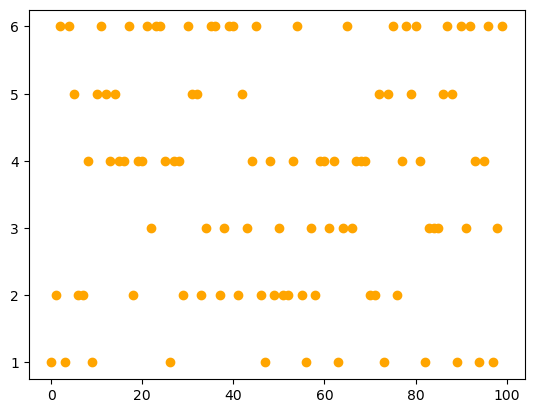

In [213]:
roll_dice_hundred.sort_values(by="value")
plt.scatter(x=roll_dice_hundred["roll"], y=roll_dice_hundred["value"], color="orange")
plt.show()

In [184]:
"""
your comments here
"""

# Since the quantity of values is big, is not possible to evaluate specifically, 
# On the other hand, it is possible to comment that the results seem equally distributed 

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [185]:
# your code here

print(calculate_mean(roll_dice_hundred["value"]))

3.74


#### 3.- Now, calculate the frequency distribution.


In [205]:
# your code here

hundred_dist = pd.DataFrame(roll_dice_hundred["value"].value_counts())
hundred_dist.index.rename("dice_number",inplace=True)

hundred_dist = hundred_dist.rename(columns={"value":"freq"}).sort_values(by="dice_number")
hundred_dist  

,freq
dice_number,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

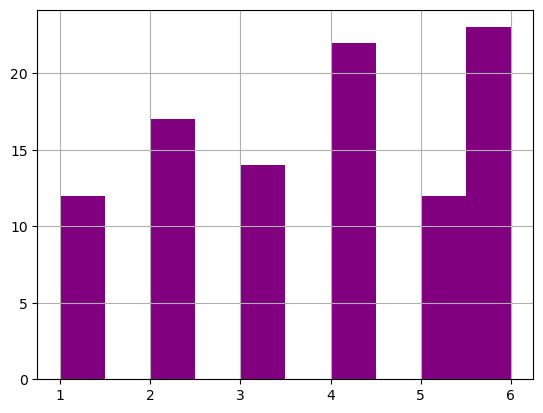

In [212]:
# your code here
roll_dice_hundred["value"].hist(color="purple")
plt.show()

In [ ]:
"""
your comments here
"""
# Again, the amount of results is big (100 values) and the results can equally be distributed by only 6 possibilities (dice numbers)
# The mean is the result of all of these results divided by the quantity of results. It makes sense that the mean is placed arounf the middle.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [209]:
# your code here

roll_dice_thousand = pd.read_csv(r"C:\Users\Cristiana\Desktop\IRONHACK BOOTCAMP\Week4\Labs\Descriptive-Stats\data\roll_the_dice_thousand.csv")
roll_dice_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


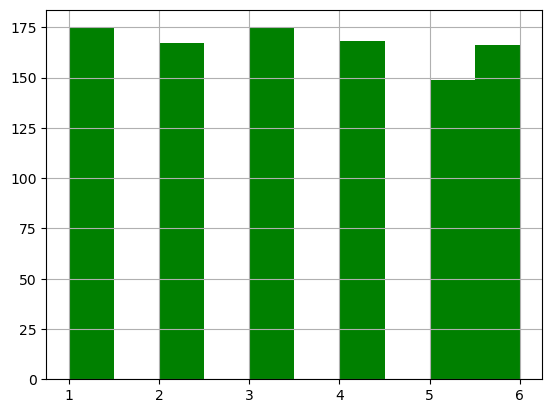

In [211]:
roll_dice_thousand["value"].hist(color="green")
plt.show()

In [ ]:
"""
your comments here
"""

# Now, the quantity of results is bigger, which makes the probability of having a more homogeneous distribution is also bigger. 


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [214]:
# your code here

age_population = pd.read_csv(r"C:\Users\Cristiana\Desktop\IRONHACK BOOTCAMP\Week4\Labs\Descriptive-Stats\data\ages_population.csv")
age_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [225]:
age_population.shape

(1000, 1)

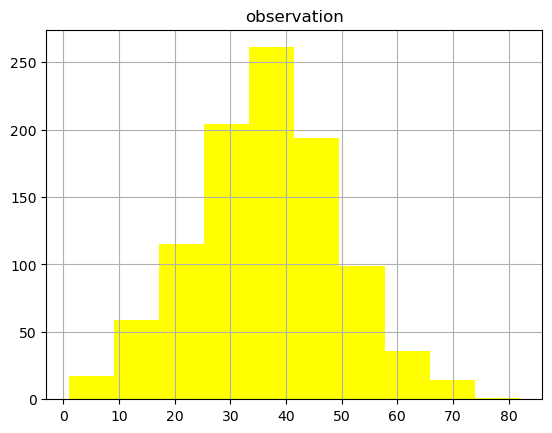

In [215]:
age_population.hist(color="yellow")
plt.show()

# by looking to the histogram, the mean should be around 37, and std deviation of 10.


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [218]:
# your code here
print(age_population["observation"].mean())
print(age_population["observation"].std())

36.56
12.816499625976762


In [219]:
print(age_population["observation"].skew())

0.018313382961328017


In [ ]:
"""
your comments here
"""

# Yes.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [220]:
# your code here

age_population2 = pd.read_csv(r"C:\Users\Cristiana\Desktop\IRONHACK BOOTCAMP\Week4\Labs\Descriptive-Stats\data\ages_population2.csv")
age_population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [224]:
age_population2.shape

(1000, 1)

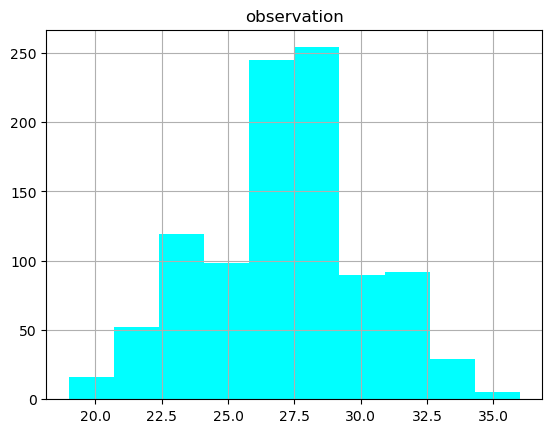

In [222]:
age_population2.hist(color="cyan")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

# Yes, this time there's still a concentration in the middle of the distribution, 
# but it is not a normal distribution as the previous one

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [223]:
# your code here

print(age_population2["observation"].mean())
print(age_population2["observation"].std())

27.155
2.969813932689186


In [ ]:
"""
your comments here
"""

# Mean and std deviation are smaller.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [227]:
# your code here
age_population3 = pd.read_csv(r"C:\Users\Cristiana\Desktop\IRONHACK BOOTCAMP\Week4\Labs\Descriptive-Stats\data\ages_population3.csv")
age_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [228]:
age_population3.shape

(1000, 1)

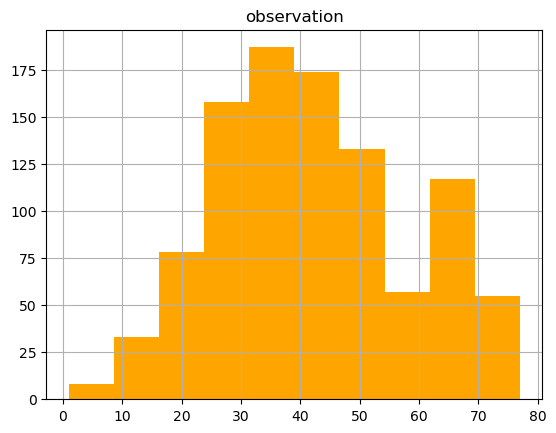

In [229]:
age_population3.hist(color="orange")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [230]:
# your code here

print(age_population3["observation"].mean())
print(age_population3["observation"].std())

41.989
16.144705959865934


In [ ]:
"""
your comments here
"""

# Older population, slightly skewed to the right.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [232]:
# your code here

q1 = np.quantile(age_population3, 0.25)
print(q1)
q2 = np.quantile(age_population3, 0.50)
print(q2)
q3 = np.quantile(age_population3, 0.75)
print(q3)

30.0
40.0
53.0


In [ ]:
"""
your comments here
"""

# The mean and median are really close to each other (40, and 41.98, respectivelly).

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [233]:
# your code here

q_15 = np.quantile(age_population3, 0.15)
print(q_15)
q_85 = np.quantile(age_population3, 0.85)
print(q_85)

25.0
64.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""